In [2]:
import pdb

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook
%load_ext autoreload

%autoreload 2

# plt.rcParams["figure.figsize"] = (6, 5)
# plt.rcParams["lines.linewidth"] = 2
# plt.rcParams["axes.grid"] = True

In [3]:
datafile = 'SCZ_sample.csv'

df = pd.read_csv(datafile)
# 48079 rows × 58 columns

print(df.columns)

print(len(df.columns))
# 데이터 내 아예 값이 없는 field: InverseRadius, AccelX, AccelY, AccelZ, VelForward, VelLateral, 
#                               AnglePitch, AngleRoll, AngleSlip, AngleRateX, AngleRateY, 
#                               MagX, MagY, MagZ, VideoSync, Pedal_brake, Fuel, IntakeBoost, 
# 

# 데이터 값이 있는 field: TimeStamp, Distance, GPS_Speed, PosLat, PosLon, AccelForward, AccelLateral, 
#                        DeviceAccelForward, DeviceAccelLateral, DeviceAccelVertical, AngleTrack, AngleRateZ, 
#                        GPS_Height, GPS_NumSat, GPS_PosAccuracy, RPM, Pedal_throttle, Steer_angle, Gear,
#                        CoolantT, OilT, Internal Batte, External Batte, 
#                        그외 TOYO_..., GPS_Slope, GPS_Elevation

# TimeStamp
# Distance
# GPS_Speed
# PosLat/ PosLon
# AccelForward: 말 그대로 차 안에 탄 사람에게 앞 뒤로 힘을 받게 하는 가속 --> Pedal_throttle이랑 관련?
# AccelLateral: 차가 turn을 할 때 양 옆으로 힘을 받게 하는 가속  --> AngleTrack, AngleRateZ, Steer_angle이랑 관련?
# DeviceAccelForward:
# DeviceAccelLateral:
# DeviceAccelVertical:
# AngleTrack: Track angle [rad]
# AngleRateZ: Yaw rate [rad/s]  # 시계를 바닥에 내려놓았다고 생각하면, 그 시계가 시계/반시계 방향으로 회전하는 rate
# GPS_Height:
# GPS_NumSat: 위성의 개수인가?? 
# GPS_PosAccuracy: 
# RPM: 
# Pedal_throttle:  이건 정확하게 뭔가??, 값이 0-100인데, 0이면 전혀 밟지 않은 상태, 100이면 완전히 밟은 상태 정도로 이해하면 되나?  
# Steer_angle:  # 길?의 방향이 degree로 0도 인거 아닌가  
# Gear: 
# CoolantT: 엔진 냉각수 온도
# OilT: 엔진 오일 온도
# Internal Batte
# External Batte
# GPS_Slope
# GPS_Elevation 
# TOYO_*: 

Index(['TimeStamp', 'Distance', 'GPS_Speed', 'PosLat', 'PosLon',
       'InverseRadius', 'AccelForward', 'AccelLateral', 'AccelX', 'AccelY',
       'AccelZ', 'DeviceAccelForward', 'DeviceAccelLateral',
       'DeviceAccelVertical', 'VelForward', 'VelLateral', 'AngleTrack',
       'AnglePitch', 'AngleRoll', 'AngleSlip', 'AngleRateX', 'AngleRateY',
       'AngleRateZ', 'GPS_Height', 'GPS_NumSat', 'GPS_PosAccuracy', 'MagX',
       'MagY', 'MagZ', 'VideoSync', 'RPM', 'Pedal_throttle', 'Pedal_brake',
       'Steer_angle', 'Gear', 'CoolantT', 'OilT', 'Fuel', 'IntakeBoost',
       'Internal Batte', 'External Batte', 'TOYO_SPEED_VEH', 'TOYO_BRAKE_PRE',
       'TOYO_BRAKE_SW', 'TOYO_IAT', 'TOYO_MAP', 'TOYO_AAT', 'TOYO_BARO',
       'TOYO_LAMBDA', 'TOYO_THROTTLE', 'TOYO_CAT1_T', 'TOYO_CLUCH_SW',
       'TOYO_WHE_FL', 'TOYO_WHE_FR', 'TOYO_WHE_RL', 'TOYO_WHE_RR', 'GPS_Slope',
       'GPS_Elevation'],
      dtype='object')
58


<IPython.core.display.Javascript object>


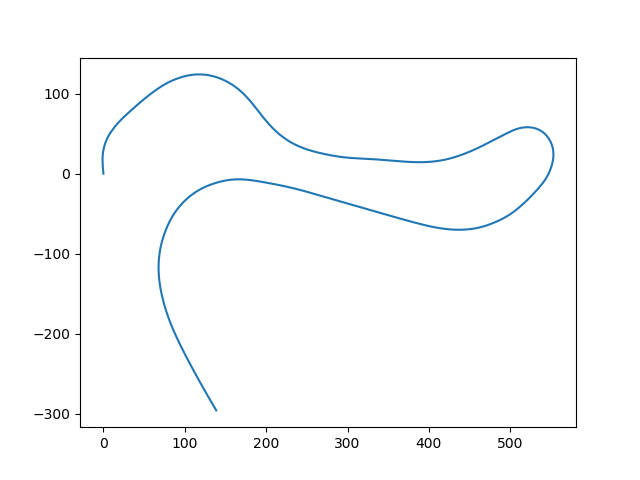

<IPython.core.display.Javascript object>


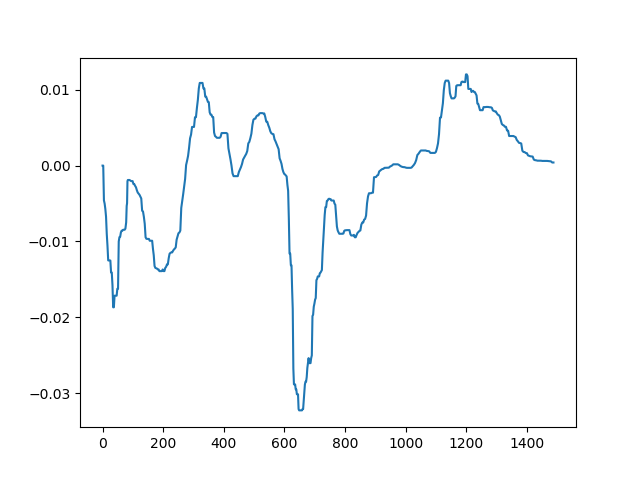

In [151]:
from sczhelper import DataHelper
isinstance(df['PosLat'],pd.DataFrame)
dataHelper = DataHelper(lat=df['PosLat'].values, lon=df['PosLon'].values, heading=df['AngleTrack'].values )
dataHelper.set_preview_distance(500)
x,y = dataHelper.get_preview_plane(1300)
s,k = dataHelper.get_preview_curve(1300)
plt.figure()
plt.plot(y,x)
plt.figure()
plt.plot(s,k)

<IPython.core.display.Javascript object>


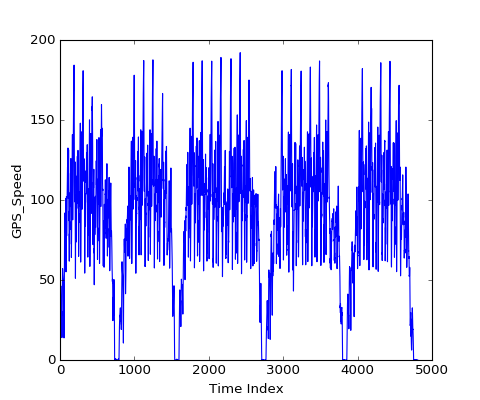

In [195]:
plt.rcParams["figure.figsize"] = (6, 5)
plt.figure()
plt.plot(df['TimeStamp'], df['GPS_Speed'])  # --> 크게 5부분으로 반복되는 것을 볼 수 있음.
plt.xlabel('Time Index')
plt.ylabel('GPS_Speed')

7361 7450 7477 7573 7593 7857 15417 15620 15722 15767 27135 27151 27160 27238 27366 27593 37974 37984 38072 38117 38127 38132 38148 38155 38161 38168 38247 38506 47517 47607 47617 47646 47704 47723 47763 47843 47912 48001 

<IPython.core.display.Javascript object>


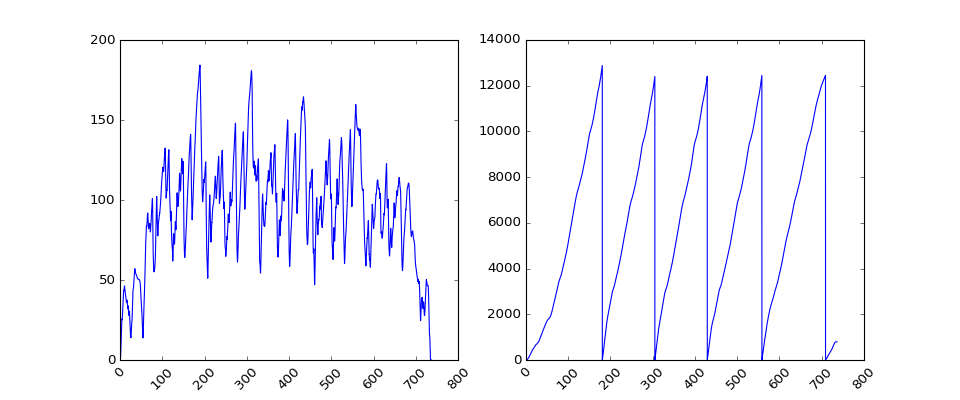

<IPython.core.display.Javascript object>


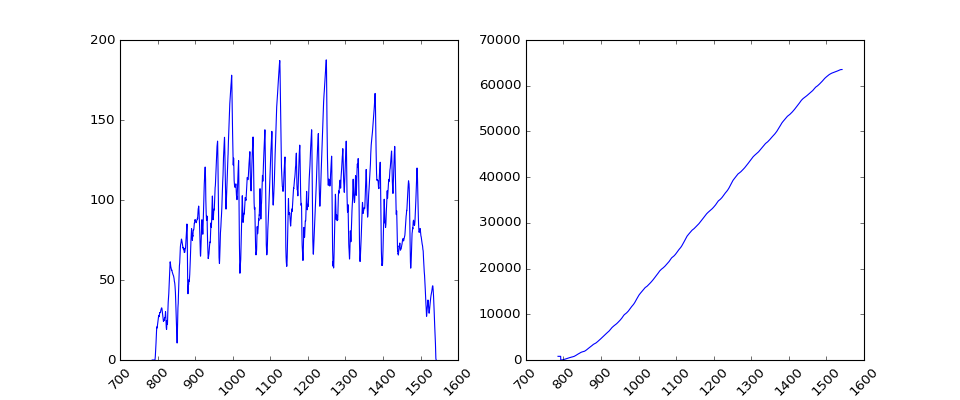

<IPython.core.display.Javascript object>


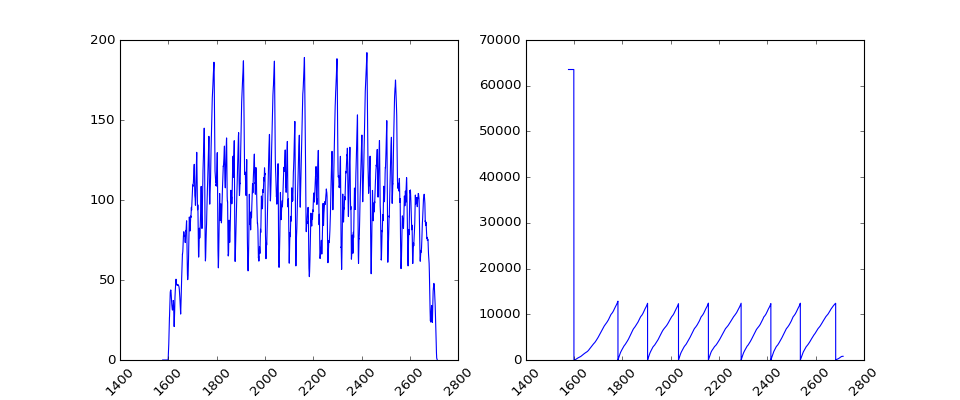

<IPython.core.display.Javascript object>


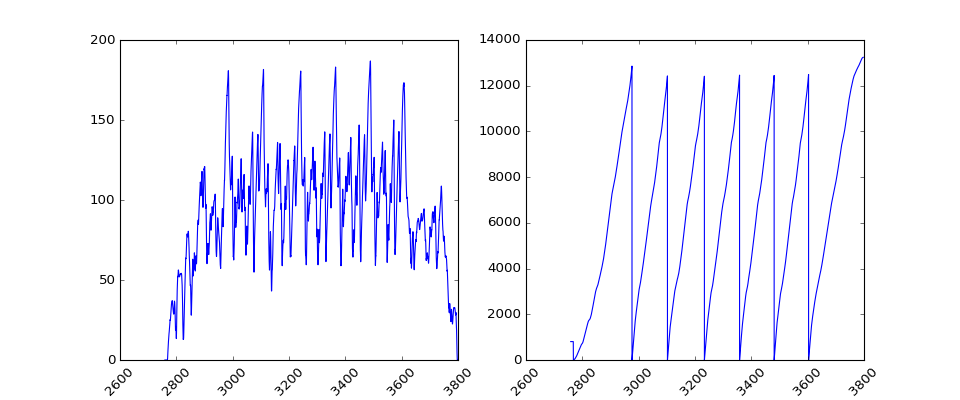

<IPython.core.display.Javascript object>


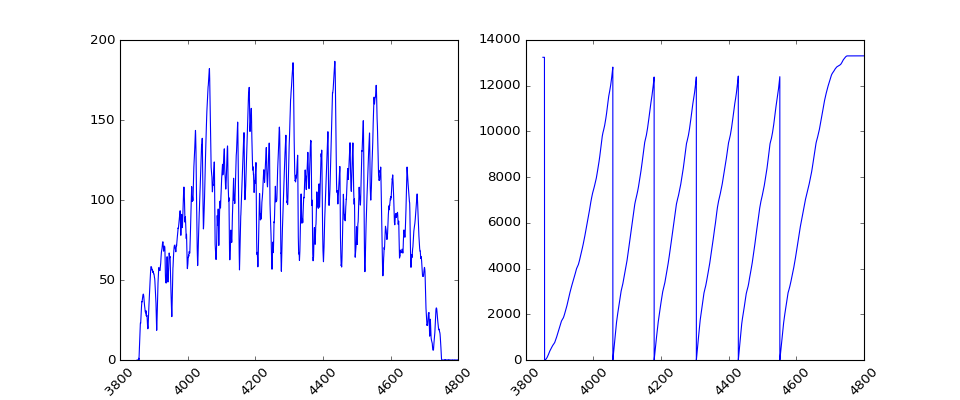

In [50]:
for i in range(1, len(df)):
    if df['GPS_Speed'].iloc[i-1] != 0 and df['GPS_Speed'].iloc[i] == 0:
        print(i, end=' ')
        # --> 0이 아니다가 처음 0이 되는 순간, LAP을 마친것이라 가정하면, 
        # 각 LAP 구간을 나타내는 time index는 
        # [0, 7361], [7857, 15417], [15767, 27135], [27593, 37974], [38506, 48001]로 정해볼 수 있다.

plt.rcParams["figure.figsize"] = (12, 5)

degrees = 45
lap_timeIdxs = [[0, 7361], [7857, 15417], [15767, 27135], [27593, 37974], [38506, 48001]]
# lap_timeIdxs = [[0, 7361], [7857, 15417], [15767, 27135], [27593, 37974], [38506, len(df)]]
for (s, f) in lap_timeIdxs:
    plt.figure()
    
    plt.subplot(1,2,1)
    plt.plot(df['TimeStamp'].iloc[s:f], df['GPS_Speed'].iloc[s:f])
    plt.xticks(rotation=degrees)
    
    plt.subplot(1,2,2)
    plt.plot(df['TimeStamp'].iloc[s:f], df['Distance'].iloc[s:f])
    plt.xticks(rotation=degrees)
# --> 그래프를 보았을 때, distance의 패턴도 반복되고 있음을 볼 수 있음.
# --> 그래서, distance를 기준으로 좀더 짧은 unit pattern (circuit 한바퀴) 을 정의함.
# --> 아래 그래프들에서와 같이 연속하여 circuit을 여러바퀴 도는 경우는 일단 제외.

0.0
1810 3053 4293 5585 7090 
15988 17815 19041 20321 21559 22914 24145 25365 26828 
27685 29768 31026 32337 33585 34812 36034 
38552 40574 41795 43043 44284 45512 


<IPython.core.display.Javascript object>


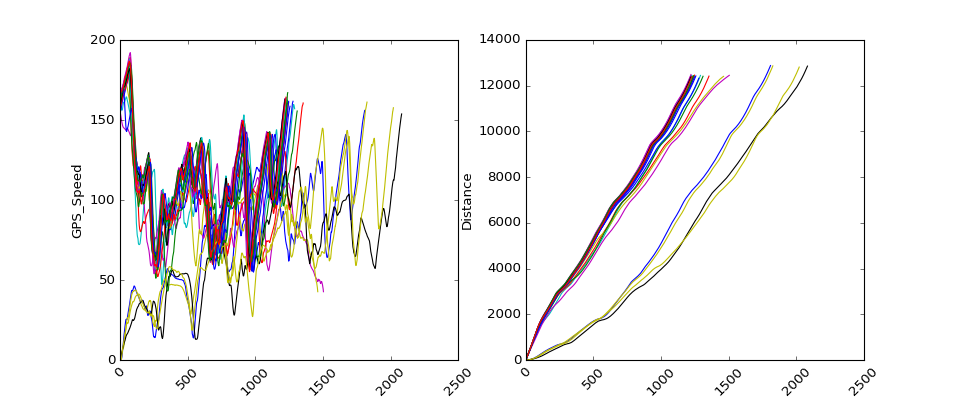

<IPython.core.display.Javascript object>


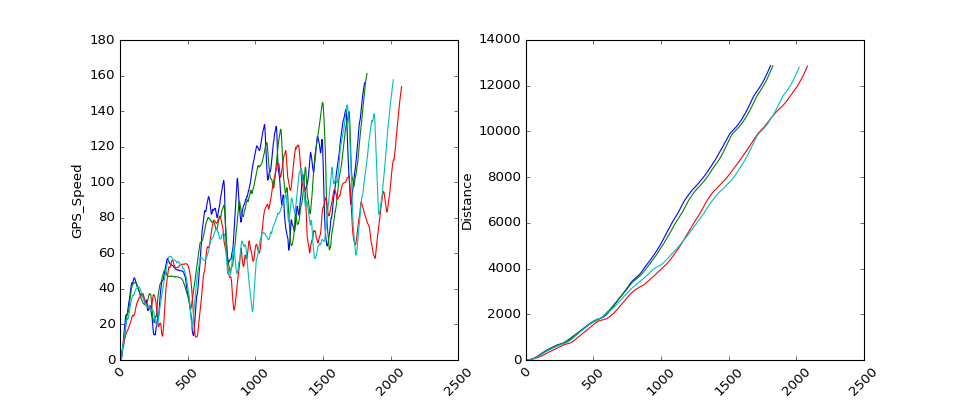

4


<IPython.core.display.Javascript object>


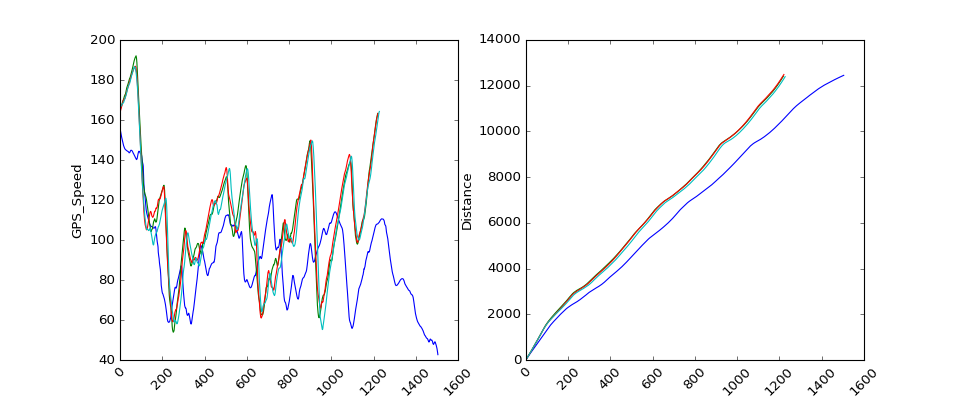

4


<IPython.core.display.Javascript object>


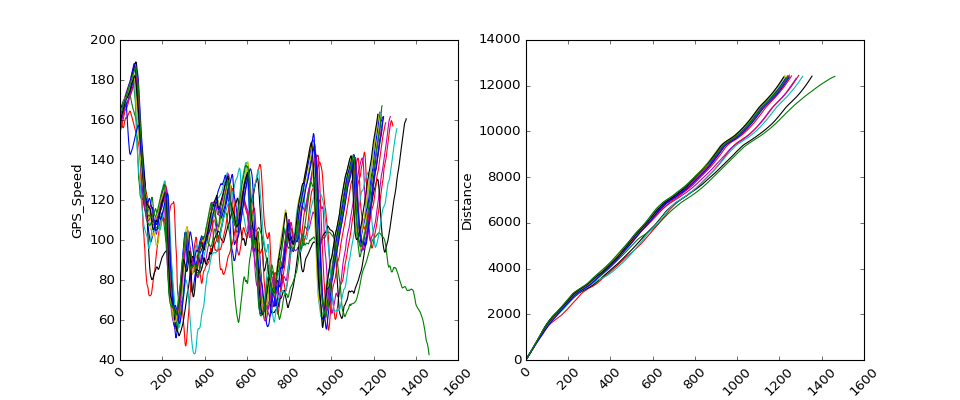

16


In [51]:
lap_timeIdxs = [[0, 7361], [15767, 27135], [27593, 37974], [38506, 48001]]  # 두번째 주행 제외 (distance 때문에)

print(df['Distance'].iloc[0])

for (s, f) in lap_timeIdxs:
    for i in range(s+1, f):
        if df['Distance'].iloc[i-1] != 0 and df['Distance'].iloc[i] == 0:
            print(i, end=' ')
    print('')
        
onelap_timeIdxs = [[0, 1810], [1810, 3053], [3053, 4293], [4293, 5585], [5585, 7090], 
                   [15988, 17815], [17815, 19041], [19041, 20321], [20321, 21559], [21559, 22914], [22914, 24145], [24145, 25365], [25365, 26828], 
                   [27685, 29768], [29768, 31026], [31026, 32337], [32337, 33585], [33585, 34812], [34812, 36034], 
#                    [36034, 38552],
                   [38552, 40574], [40574, 41795], [41795, 43043], [43043, 44284], [44284, 45512]]

def draw_1graphs_SD(timeIdxs):  # draw speed and distance graph on an one window
    plt.figure()
    for (s, f) in timeIdxs:
        plt.subplot(1,2,1)
        plt.plot(range((f-s)), df['GPS_Speed'].iloc[s:f])
        plt.xticks(rotation=degrees)
        plt.xlabel('Time Index')
        plt.ylabel('GPS_Speed')
        plt.hold(True)

        plt.subplot(1,2,2)
        plt.plot(range((f-s)), df['Distance'].iloc[s:f])
        plt.xticks(rotation=degrees)
        plt.xlabel('Time Index')
        plt.ylabel('Distance')
        plt.hold(True)

draw_1graphs_SD(onelap_timeIdxs)

# --> 실제로는 다 같은 사람이 운전했을테지만, GPS_Speed pattern (Driver model?)에 영향을 미치는 인자를 찾아보기 위해,
#     임의로 (시각적으로 다르다고 생각되는 패턴들끼리) 가상의 서로 다른 운전자가 운전하였다고 가정해 보겠음.
#     그러면, 출발할때, 중간, 도착할때, 로 분류됨. 
# --> 아닌가, 시작 속력이 0이 아닐 수는 없으니, 이렇게 하면 안되나... 
#     출발일때랑, 출발하고 다시 돌때랑 궤적이 다름! 

user1_timeIdxs = [[0, 1810], [15988, 17815], [27685, 29768], [38552, 40574]]
draw_1graphs_SD(user1_timeIdxs)
print(len(user1_timeIdxs))

user2_timeIdxs = [[5585, 7090], [24145, 25365], [34812, 36034], [44284, 45512]]
draw_1graphs_SD(user2_timeIdxs)
print(len(user2_timeIdxs))

user3_timeIdxs = [x for x in onelap_timeIdxs if x not in (user1_timeIdxs + user2_timeIdxs)]
draw_1graphs_SD(user3_timeIdxs)
print(len(user3_timeIdxs))

<IPython.core.display.Javascript object>


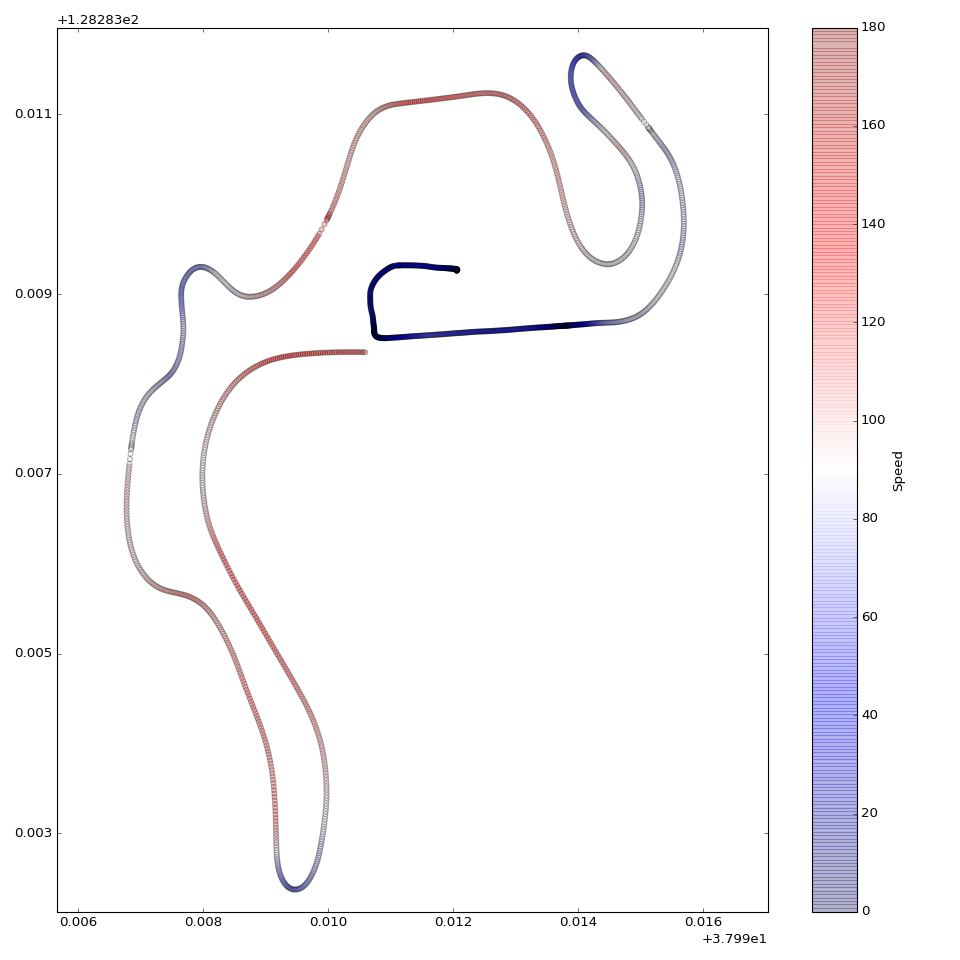

<IPython.core.display.Javascript object>


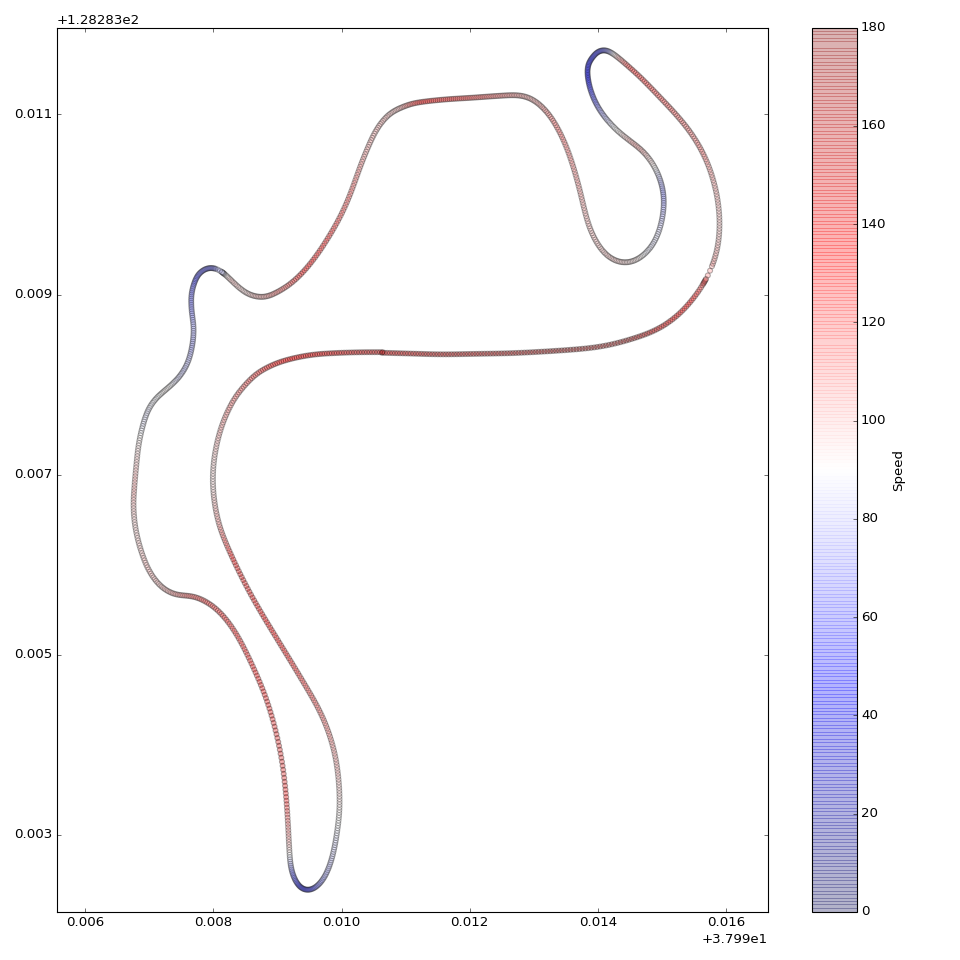

<IPython.core.display.Javascript object>


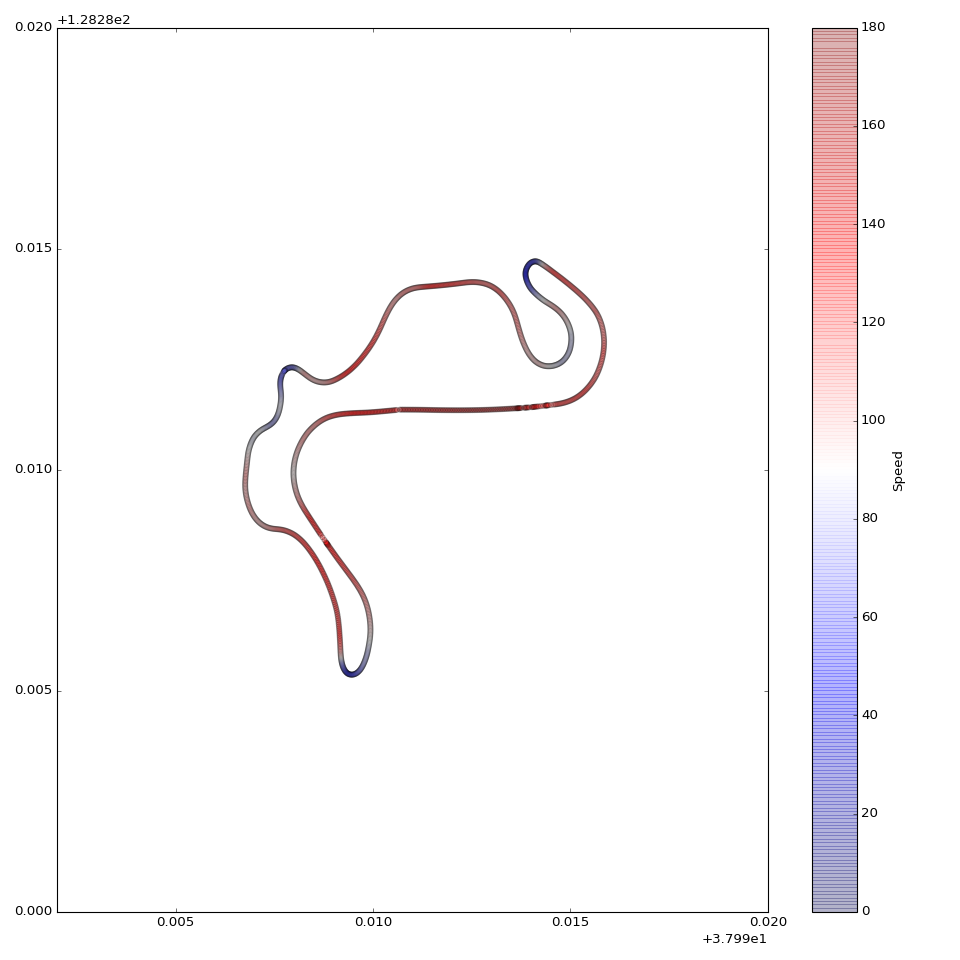

<IPython.core.display.Javascript object>


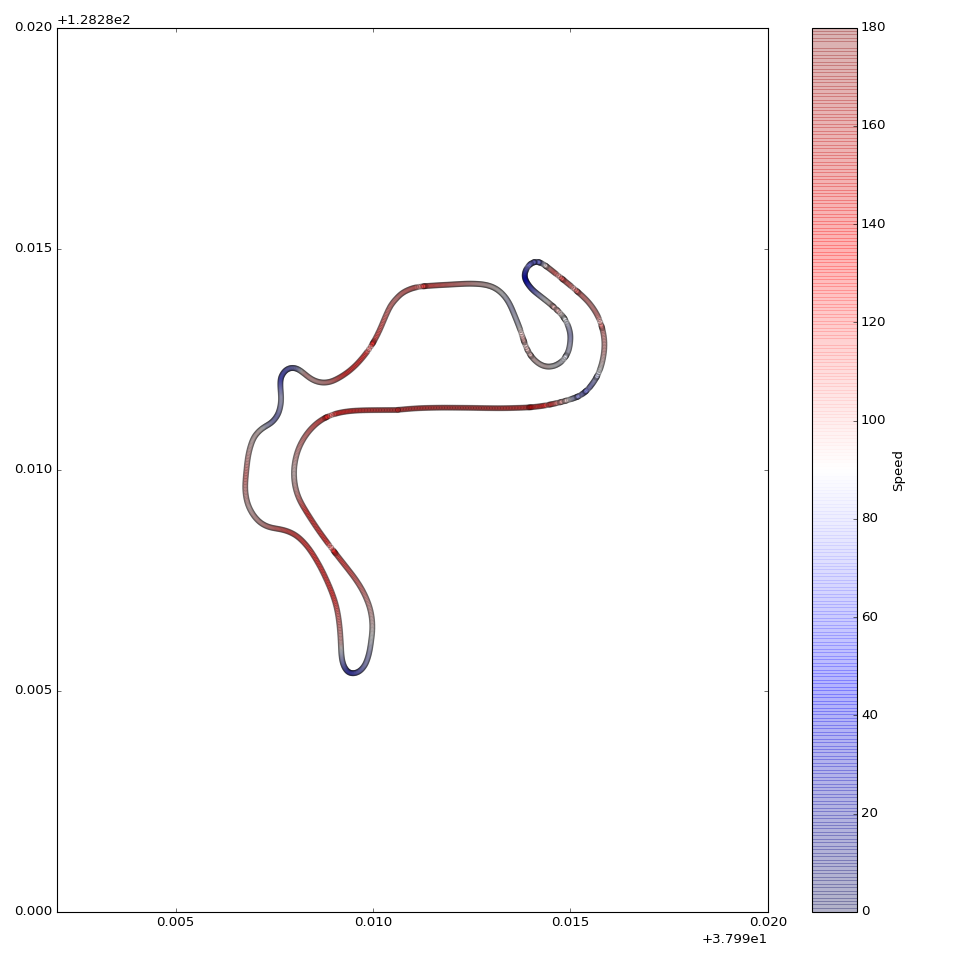

<IPython.core.display.Javascript object>


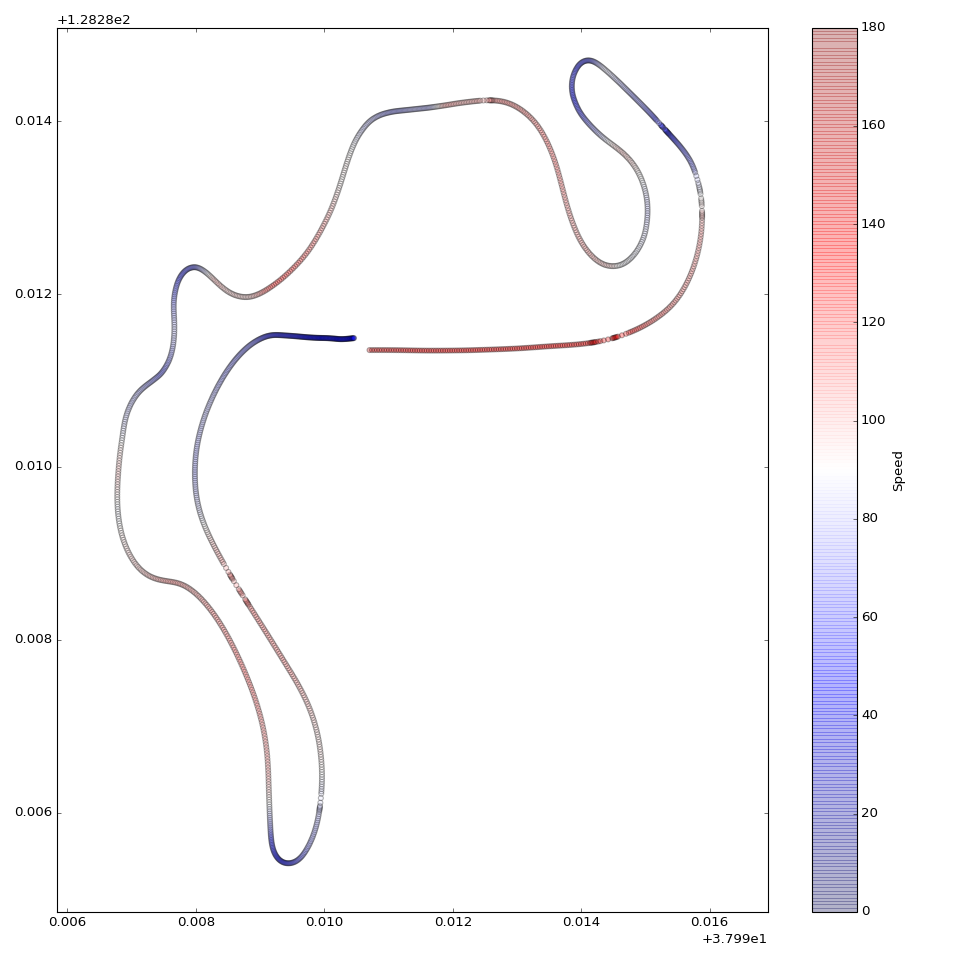

In [188]:
# 여기까지는 TimeStamp vs. GPS_Speed와 Distance를 봄.

# Distance vs. (PosLat, PosLon)을 봐보자
# timeIdx = [0, 1810]  # example
# s, f = timeIdx
# plt.figure()
# plt.scatter(df['PosLat'].iloc[s:f], df['PosLon'].iloc[s:f])

from mpl_toolkits.mplot3d import Axes3D
    
def draw_3dgraph_distance(timeIdx):
    s, f = timeIdx

    fig = plt.figure()

    ax = fig.gca(projection='3d')
    z = df['Distance'].iloc[s:f]
    x = df['PosLat'].iloc[s:f]
    y = df['PosLon'].iloc[s:f]
    
    ax.plot(x.values, y.values, z.values)
    
    plt.title('{}-{}'.format(s, f))

# draw_3dgraph_distance([0, 1810])
# draw_3dgraph_distance([1810, 3053])

# --> 안쪽에 말린 곳 끝부분이 시작점!
# --> 매 운행?의 출발 일때와 출발 이후 일때 궤적이 다름!!! ... 


# GPS_Speed vs. (PosLat, PosLon)  # 2d scatter가 색 구분이 좀더 잘됨..
from mpl_toolkits import mplot3d

def draw_3dgraph_speed(timeIdx):
    s, f = timeIdx
    
    fig = plt.figure()

#     ax = plt.axes(projection="3d")
    z_line = df['Distance'].iloc[s:f]
    x_line = df['PosLat'].iloc[s:f]
    y_line = df['PosLon'].iloc[s:f]
#     ax.plot(x_line, y_line, z_line, 'gray')
    
    c_speed = df['GPS_Speed'].iloc[s:f]
    
#     sc = ax.scatter(x_line, y_line, z_line, c=c_speed, cmap='seismic')
#     plt.colorbar(sc)
    plt.scatter(x_line, y_line, c=c_speed, cmap='seismic', alpha=0.3)
    plt.colorbar(label="Speed")
    plt.clim(0, 180)
    plt.tight_layout()
        
plt.rcParams["figure.figsize"] = (12, 12)
draw_3dgraph_speed([0, 1810])
draw_3dgraph_speed([1810, 3053])
draw_3dgraph_speed([3053, 4293])
draw_3dgraph_speed([4293, 5585])
draw_3dgraph_speed([5585, 7090])  # 마지막 바퀴는 stop sign이나 red signal?이 있는 것처럼 생각하면 되나?          

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


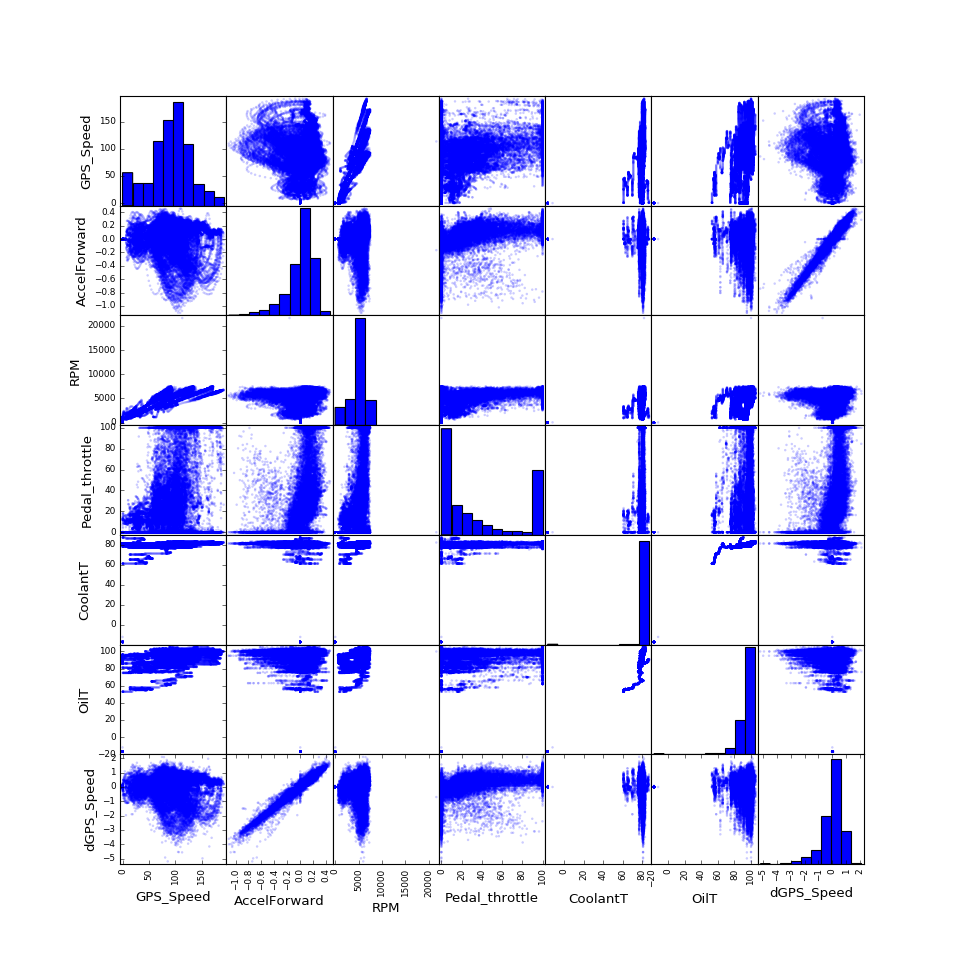

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B72907908>,
      dtype=object)

In [77]:
# 앞으로 나아가는 운동과 관련된 데이터들을 살펴보자
# GPS_Speed, AccelForward, RPM, Pedal_throttle, CoolantT, OilT

onelap_timeIdxs

def draw_plots_r_speed(timeIdx):
    s, f = timeIdx
    
    fig = plt.figure()

    plt.subplot(1,4,1)
    plt.plot(range((f-s)), df['GPS_Speed'].iloc[s:f])
    plt.xticks(rotation=degrees)
    plt.xlabel('Time Index')
    plt.ylabel('GPS_Speed')
    plt.hold(True)

    plt.subplot(1,4,2)
    plt.plot(range((f-s)), df['AccelForward'].iloc[s:f])
    plt.xticks(rotation=degrees)
    plt.xlabel('Time Index')
    plt.ylabel('AccelForward')
    plt.hold(True)

    plt.subplot(1,4,3)
    plt.plot(range((f-s)), df['RPM'].iloc[s:f])
    plt.xticks(rotation=degrees)
    plt.xlabel('Time Index')
    plt.ylabel('RPM')
    plt.hold(True)

    plt.subplot(1,4,4)
    plt.plot(range((f-s)), df['Pedal_throttle'].iloc[s:f])
    plt.xticks(rotation=degrees)
    plt.xlabel('Time Index')
    plt.ylabel('Pedal_throttle')
    plt.hold(True)

# for timeIdx in onelap_timeIdxs:
#     draw_plots_r_speed(timeIdx)  # 별로 좋지 않은 시각화 인듯

df_speed = df[['GPS_Speed', 'AccelForward', 'RPM', 'Pedal_throttle', 'CoolantT', 'OilT']]
df_speed['dGPS_Speed'] = df_speed['GPS_Speed'] - df_speed['GPS_Speed'].shift(1)
# df_speed

plt.rcParams["figure.figsize"] = (12, 12)
pd.plotting.scatter_matrix(df_speed, alpha=0.2)
# --> 눈에 띄는 관계는, (GPS_Speed - RPM), 
#                      (AccelForward - dGPS_Speed) 이거 두개 정도? 

<IPython.core.display.Javascript object>


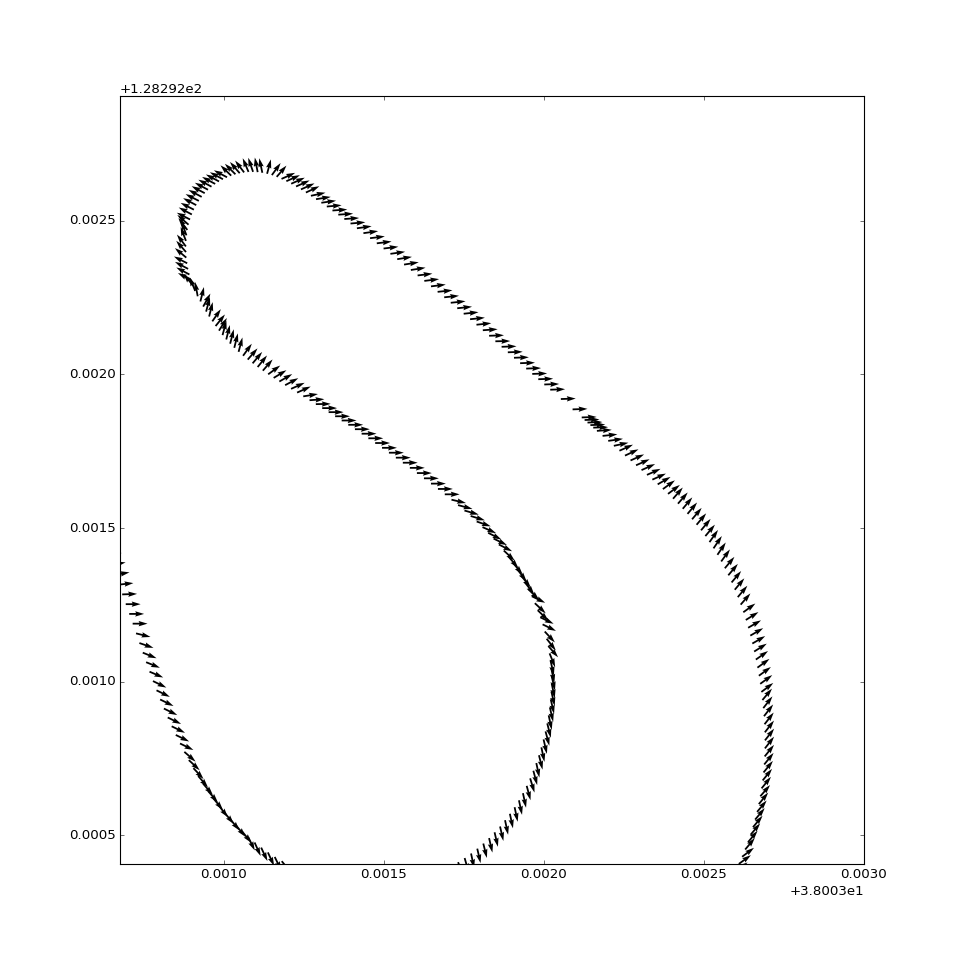

<IPython.core.display.Javascript object>


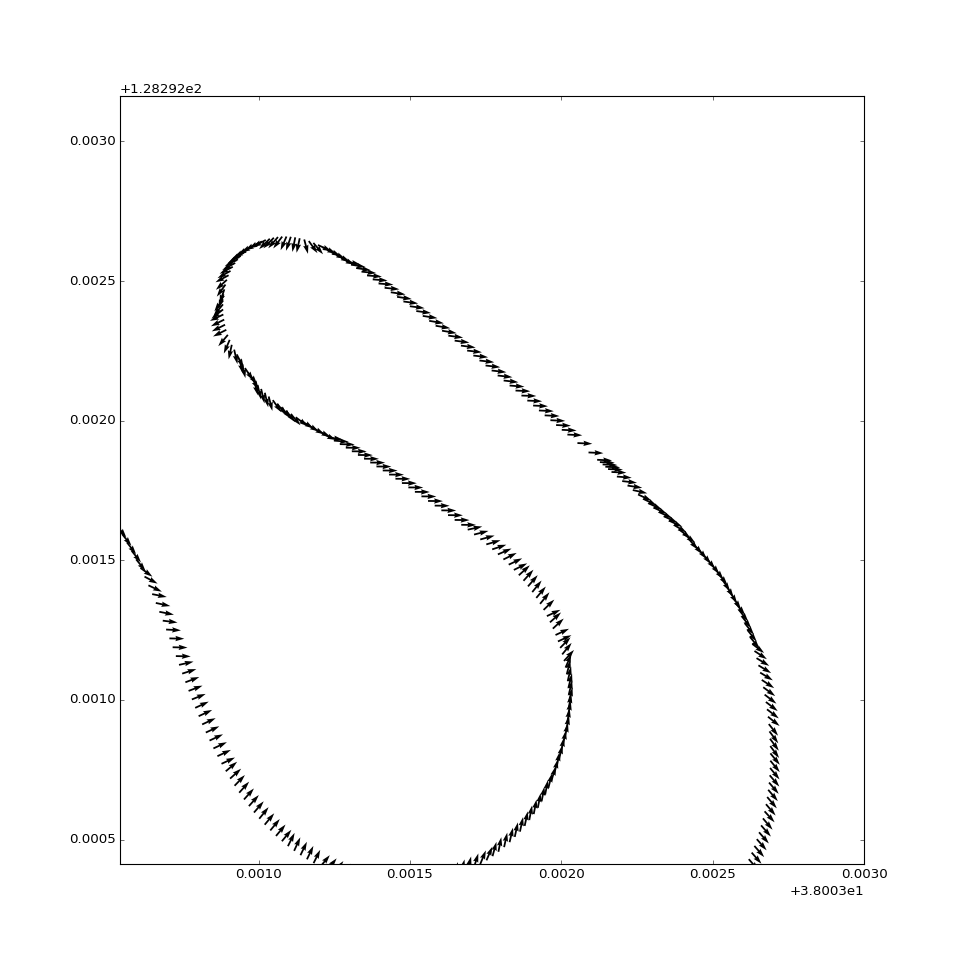

In [181]:
# Steer_angle vs. (PosLat, PosLon)
# t시각에서 향하고 있는 방향 (location[t] - location[t-1])을 0도로 기준삼아, 우회전은 +, 좌회전은 -로, 두었을 때,
# t시각의 Steer_angle이 향하는 방향을 시각화 해보고자 한다.

# 여기서 알아둬야 할것은, python의 plt.quiver 에서는 0도를 x축의 +방향으로 하고, 반시계방향으로 +각도가 된다는 것이다.

import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 12)

import math

timeIdx = [0, 1810]
s, f = timeIdx

x = df['PosLat'].iloc[s:f]
y = df['PosLon'].iloc[s:f]

steer_angles = df['Steer_angle'].iloc[s:f]  # 매 시각에서 차량의 진행 방향으로 0도로 했을 때, 우회전 방향을 +로 하는 deg 각도

steer_angles_4py = []  # python에서 차량 방향을 기준으로 기록된 각도를 시각화 하기 위해 변환이 필요함.
for i in range(1, len(x)):  # i=0에서는 차가 어떤 방향을 향하고 있는지 모름.
    if x[i] == x[i-1]:
        current_dir = math.pi/2  # [rad]  # 시각 i에서 차량이 향하고 있는 방향
    else:
        current_dir = np.arctan( (y[i]-y[i-1]) / (x[i]-x[i-1]) )
        
        steer_angles_4py.append(current_dir + (-1) * steer_angles[i])
        
# print(steer_angles[:30])
# print(steer_angles_4python[:30])

u = [math.cos(math.pi/180*deg) for deg in steer_angles]
v = [math.sin(math.pi/180*deg) for deg in steer_angles]

u_4py = [math.cos(math.pi/180*deg) for deg in steer_angles_4python]
v_4py = [math.sin(math.pi/180*deg) for deg in steer_angles_4python]

plt.figure()
plt.quiver(x[1:], y[1:], u, v, scale=50)

plt.figure()
plt.quiver(x[1:], y[1:], u_4py, v_4py, scale=50)

# 방향이 생각보다 직관적이지 않네... 잘못 처리했나... 
# 차량 진행 방향으로 0으로 했을 때, 우회전이 강할수록 빨강, 좌회전이 강할수록 파랑, 이런식으로 시각화 해보면 도움이 되려나?

<IPython.core.display.Javascript object>


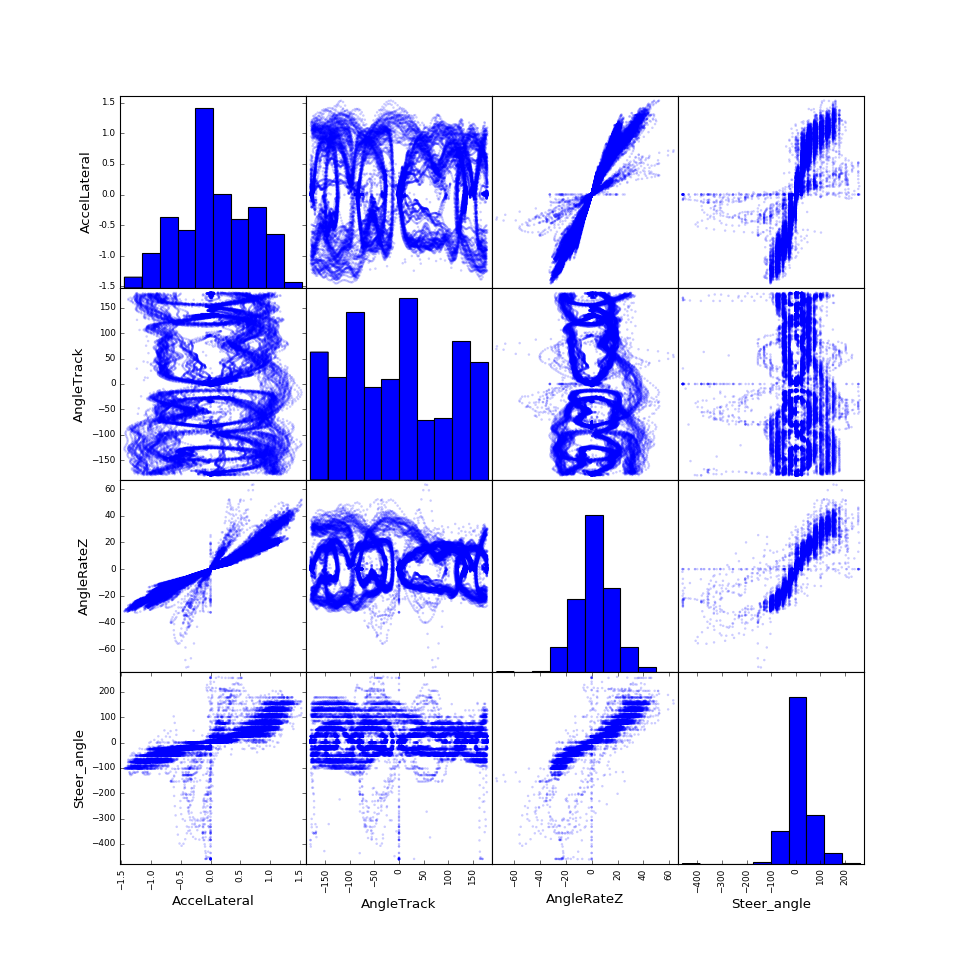

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B060E9C88>,
      dtype=object)

In [183]:
# 회전하는 운동과 관련된 데이터들을 살펴보자
# AccelLateral, AngleTrack, AngleRateZ, Steer_angle

df_steer = df[['AccelLateral', 'AngleTrack', 'AngleRateZ', 'Steer_angle']]
df_steer

plt.rcParams["figure.figsize"] = (12, 12)
pd.plotting.scatter_matrix(df_steer, alpha=0.2)

# 뭐지... 희안하게 생긴 그래프들이 나옴... ... .


In [48]:
# 예제 코드

# from mpl_toolkits import mplot3d

# fig = plt.figure()
# ax = plt.axes(projection="3d")

# num_bars = 15
# x_pos = np.random.choice(range(20), num_bars)
# y_pos = np.random.choice(range(20), num_bars)
# z_pos = [0] * num_bars
# x_size = np.ones(num_bars)
# y_size = np.ones(num_bars)
# z_size = np.random.choice(range(20), num_bars)

# ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='aqua')
# # plt.show()

<IPython.core.display.Javascript object>


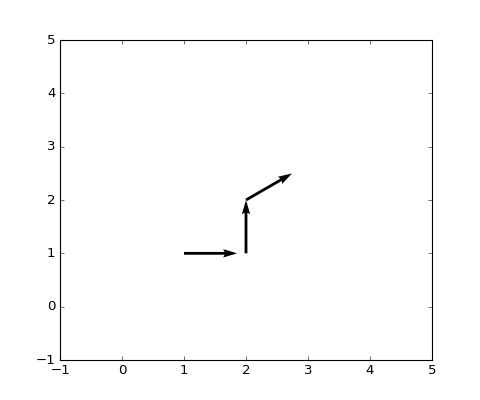

(-1, 5)

In [177]:
# 예제 코드
# n = 8
# X, Y = np.mgrid[0:n, 0:n]
# T = np.arctan2(Y - n / 2., X - n/2.)
# R = 10 + np.sqrt((Y - n / 2.0) ** 2 + (X - n / 2.0) ** 2)
# U, V = R * np.cos(T), R * np.sin(T)

# plt.axes([0.025, 0.025, 0.95, 0.95])
# plt.quiver(X, Y, U, V, R, alpha=.5)
# plt.quiver(X, Y, U, V, edgecolor='k', facecolor='None', linewidth=.5)

# plt.xlim(-1, n)
# plt.xticks(())
# plt.ylim(-1, n)
# plt.yticks(())

## 예제 코드 2- degree
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams["figure.figsize"] = (6, 5)

import math


# x = [0, 1, 2, 3, 4, 1]
# y = [0, 1, 2, 3, 4, 3]

# angles = [0, 45, 90, -45, -90, -180]  # 각 (x, y)에서 x축 +방향을 0도로 할때의 angle임.

# u = [math.cos(math.pi/180*deg) for deg in angles]
# v = [math.sin(math.pi/180*deg) for deg in angles]

# plt.quiver(x, y, u, v, scale=7)
# plt.xlim(-1, 5)
# plt.ylim(-1, 5)

## 근데, 차량 데이터에서 기록된 Steer_angle은 매 차량 진행 방향을 0도로 했을 때의 angle이므로, 
## 다른 처리가 필요함.

x = [0, 1, 2, 2]
y = [0, 1, 1, 2]

steer_angles = [45, 45, -90, 60]

steer_angles_4python = []
for i in range(1, len(x)): 
    if x[i] == x[i-1]:
        current_dir = math.pi/2  # [rad]
    else:
        current_dir = np.arctan(y[i]-y[i-1] / (x[i] - x[i-1]))  # [rad]
    current_dir = np.rad2deg(current_dir)  # [deg]
    
    steer_angles_4python.append(current_dir + (-1) * steer_angles[i]) 
    
#     print(i, current_dir, steer_angles_4python)

# print(steer_angles_4python)  # [deg]

u = [math.cos(math.pi/180*deg) for deg in steer_angles_4python]
v = [math.sin(math.pi/180*deg) for deg in steer_angles_4python]

# print(x, y, u, v)

plt.quiver(x[1:], y[1:], u, v, scale=7)

plt.xlim(-1, 5)
plt.ylim(-1, 5)